In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
authors = pd.read_pickle("../../data/interim/country_authors_with_all_taxonomic_articles.pkl")
# get unique authors per journal
authors = authors.drop_duplicates(subset=["author_id", "source_id"])

# disambiguate

# start with journal that has most authors
first_journal = max(authors["source_id"],key=list(authors["source_id"]).count)
journal_path = [first_journal,]

authors_seen = list(authors[authors["source_id"]==first_journal]["author_id"])
nr_authors_path = [len(authors_seen),]

unexplored = list(set(authors["source_id"]))
unexplored.remove(first_journal)

In [3]:
# dictionary with journal name and author ids per journal
journal_authors = {}
for journal in set(authors["source_id"]):
    journal_authors[journal] = list(authors[authors["source_id"]==journal]["author_id"])

In [4]:
# find out how many of the authors in a proposed journal have already been seen
def not_in_common(authors1, journal2):
    authors2 = journal_authors[journal2]
    # get number of authors in journal2 not in total author list so far
    n = 0
    for author in authors2:
        if author not in authors1:
            n += 1
    return n

In [5]:
journal_path

['https://openalex.org/S202381698']

In [6]:
# find path of least resistance through journals
while unexplored != None:
    best_journal = ""
    best_author_nr = 0

    # go over every unexplored journal to find out if they're the best
    for j in unexplored:
        new_blood = not_in_common(authors_seen, j)
        # save best journal
        if new_blood > best_author_nr:
            best_author_nr = new_blood
            best_journal = j
    
    # if none of the journals add new authors, stop
    if best_author_nr == 0:
        break
        
    # add to path
    authors_seen.extend(journal_authors[best_journal])
    journal_path.append(best_journal)
    nr_authors_path.append(best_author_nr)
    print("Next best: "+journal_path[-1])
    
    unexplored.remove(best_journal)

Next best: https://openalex.org/S171471881
Next best: https://openalex.org/S102181007
Next best: https://openalex.org/S100787194
Next best: https://openalex.org/S1983995261
Next best: https://openalex.org/S2764367193
Next best: https://openalex.org/S199213172
Next best: https://openalex.org/S4210230202
Next best: https://openalex.org/S96989847
Next best: https://openalex.org/S151808461
Next best: https://openalex.org/S126748203
Next best: https://openalex.org/S58631098
Next best: https://openalex.org/S163860444
Next best: https://openalex.org/S158228368
Next best: https://openalex.org/S57552105
Next best: https://openalex.org/S125754415
Next best: https://openalex.org/S159699259
Next best: https://openalex.org/S3006207977
Next best: https://openalex.org/S26519103
Next best: https://openalex.org/S65478581
Next best: https://openalex.org/S2764351231
Next best: https://openalex.org/S19032547
Next best: https://openalex.org/S64097828
Next best: https://openalex.org/S98424699
Next best: htt

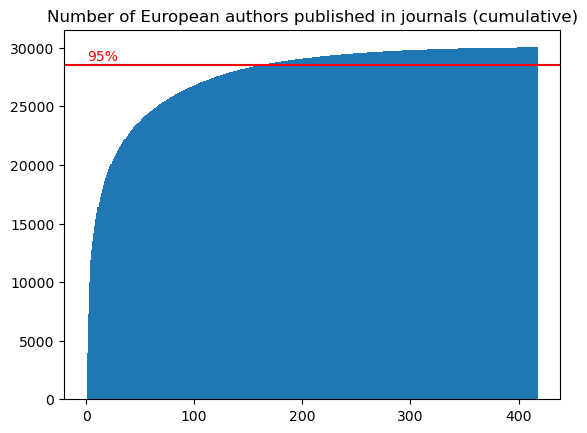

In [7]:
# plot path through journals with most new authors, cumulatively
fig, ax = plt.subplots()
cumulative_path = np.cumsum(nr_authors_path)

plt.bar(x=range(1,len(journal_path)+1), height=cumulative_path, width=1.0)
ax.set_title("Number of European authors published in journals (cumulative)")

# add 95% line
value_95 = cumulative_path[-1]*0.95
plt.axhline(y=value_95, color="red", label="95%")
ax.text(0.5, value_95+400,"95%", color="red")

plt.savefig("../../reports/figures/cumulative_graph_european_authors_in_journals.png")

In [8]:
journal_id_names.loc[journal_id].iloc[0]

NameError: name 'journal_id_names' is not defined

In [ ]:
journal_id_names

In [ ]:
# save the path we took as journals_cumulative_path.txt
journal_id_names = authors[["source_display_name", "source_id"]].drop_duplicates(subset=["source_id"])
journal_id_names = journal_id_names.set_index("source_id")

with open("../../data/interim/journals_cumulative_path.txt", "w", encoding="utf-8") as f:
    for journal_id in journal_path:
        # write each item on a new line
        journal_name = journal_id_names.loc[journal_id]
        print(journal_name)
        f.write(journal_name[0]+"\n")
    # add last journals too
    for journal_id in unexplored:
        journal_name = journal_id_names.loc[journal_id]
        f.write(journal_name[0]+"\n")

In [ ]:
import pandas as pd
import numpy as np
import pickle
import time
from matplotlib import pyplot as plt
from operator import add

In [ ]:
first_names = pd.read_csv("../../data/processed/crop wild relatives.tsv", sep="\t")

In [ ]:
first_names = pd.read_csv("../../data/processed/gender_per_author.tsv", sep="\t")

In [ ]:
first_names[first_names["publication_year"]==1973]

In [ ]:
 import re

In [ ]:
for i, row in first_names.iterrows():
    if re.search("^[A-Z]\.", row["firstName"]):
        first_names.loc[i, "gender"] = "initials"

In [ ]:
first_names[first_names["publication_year"]==2020].value_counts(subset="gender")

In [ ]:
first_names.to_csv("../../data/processed/gender_per_author.tsv", sep="\t")

In [ ]:

def plot_gender_balance(first_names, title, filename, start_year=1953):
    male = []
    female = []
    inconclusive = []

    for year in range(start_year,2023):
        counts = first_names[first_names["publication_year"]==year]["gender"].value_counts()

        male.append(counts["male"])
        female.append(counts["female"])
        inconclusive.append(counts["inconclusive"])

    fig, ax = plt.subplots()
    
    plt.title(title)
    ax.bar(range(start_year,2023), male, label="male", color="blue")
    ax.bar(range(start_year,2023), female, label="female", color="red", bottom=male)
    ax.bar(range(start_year,2023), inconclusive, label="inconclusive", color="grey", 
           bottom=list(map(add, male, female)))
    ax.legend()

    plt.savefig(filename)

    
plot_gender_balance(first_names,
                    "Gender balance of taxonomists",
                    "../../reports/figures/gender_balance.png",
                    start_year=2013)


def plot_gender_balance_percentage(first_names, title, filename, start_year=1973):
    male = []
    female = []
    inconclusive = []

    for year in range(start_year,2023):
        counts = first_names[first_names["publication_year"]==year]["gender"].value_counts()
        male.append(counts["male"])
        female.append(counts["female"])
        inconclusive.append(counts["inconclusive"])
    
    total = list(map(add, male, female)) # in two steps because map can only add two lists at a time
    total = list(map(add, total, inconclusive))
    
    male_perc = np.divide(male, total)
    female_perc = np.divide(female, total)
    inc_perc = np.divide(inconclusive, total)
    
    fig, ax = plt.subplots()

    plt.title(title)
    ax.bar(range(start_year,2023), female_perc, label="feminine", color="blue")
    ax.bar(range(start_year,2023), male_perc, label="masculine", color="red", bottom=female_perc)
    ax.bar(range(start_year,2023), inc_perc, label="inconclusive", color="grey", bottom=female_perc+male_perc)
    ax.legend()

    plt.savefig(filename)

plot_gender_balance_percentage(first_names, 
                               "Gender balance of taxonomists",
                               "../../reports/figures/gender_percentages.png")


In [ ]:
authors = pd.read_pickle("../../data/interim/eu_filtered_articles_50_years.pkl")
authors

In [ ]:
authors.columns

In [ ]:
import pandas as pd

In [ ]:
authors = pd.read_pickle("../../data/processed/european_authors_disambiguated_with_taxonomy.pkl")

In [ ]:
authors

In [ ]:
order_counts

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # version 3.5.2
import fiona
import geopandas as gpd
import pickle
from itertools import groupby

In [ ]:
eu_articles = pd.read_pickle("../../data/processed/european_taxonomic_articles_with_subjects.pkl")

In [ ]:
eu_articles.authorships[0]

In [ ]:
for article in eu_articles.itertuples():
    countries = []
    for author in article.authorships:
        for institution in author["institutions"]:
            countries.append(institution["country_code"])
            
    if "BG" in countries:
        print(set(countries))

In [ ]:
articles = pd.read_pickle("../../data/interim/filtered_articles.pkl")

In [ ]:
import prep_articles

In [ ]:
set(eu_authors["inst_country_code"])

In [ ]:
def freq_countries(df):
    # get list of countries with authors
    countries = list(df["inst_country_code"])
    # remove None values + alphabetical
    countries = sorted([i for i in countries if i is not None])
    
    # count how many of each group (country)
    freqs = [len(list(group)) for key, group in groupby(countries)]
    
    # link counts to country codes
    freqs_dict = {}
    for i, country in enumerate(sorted(set(countries))):
        freqs_dict[country] = freqs[i]

    return freqs_dict

In [ ]:
country_codes = pd.read_csv("../../data/external/country_codes.tsv", sep="\t")
country_codes

In [ ]:
pop = pd.read_csv("../../data/external/population_counts.csv", skiprows=4)
pop

In [ ]:
countries = pd.merge(country_codes, pop[["Alpha-3 code", "2022"]], how="left", on="Alpha-3 code")

In [ ]:
countries.columns = ["Country", "Alpha-2 code", "Alpha-3 code", "Population"]
countries

In [ ]:
countries.to_csv("../../data/external/country_codes_and_population.tsv", sep="\t")

In [ ]:
pop = pop.rename(columns = {"Country Code":"Alpha-3 code"})

In [ ]:
pop

In [ ]:
# get worldmap 
def plot_country_freqs(freqs, map_path, europe=False, dpi='figure', relative=False):
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    worldmap = worldmap.to_crs("ESRI:54009") # Mollweide projection

    # convert 3-letter codes to 2-letter codes used for frequencies
    country_codes = pd.read_csv("../../data/external/country_codes.tsv", sep="\t")
    
    worldmap = worldmap.rename(columns={"iso_a3":"Alpha-3 code"})
    # fixing country codes in worldmap
    worldmap.at[43,"Alpha-3 code"] = "FRA"
    worldmap.at[21,"Alpha-3 code"] = "NOR"
    worldmap.at[174,"Alpha-3 code"] = "XKX"
    
    worldmap = pd.merge(worldmap, country_codes[["Alpha-2 code", "Alpha-3 code"]], 
                        on="Alpha-3 code", how="left")

    # add frequencies to worldmap
    worldmap["freq"] = worldmap["Alpha-2 code"].map(freqs)
    worldmap["freq"].fillna(0, inplace=True)
    worldmap.replace(0, np.nan, inplace=True)
    
    if relative:
        worldmap = worldmap.rename(columns={"freq":"absolute_freq"})
        # map percentage of country's population that are taxonomists
        worldmap["freq"] = worldmap["absolute_freq"]/worldmap["pop_est"]*100
            
    # plot frequencies
    if not europe:
        fig, ax = plt.subplots(1,1)
        worldmap.plot(column='freq', cmap="viridis", ax=ax, legend=True,
                      missing_kwds={"color":"lightgrey"})
    
    if europe:
        fig, ax = plt.subplots(1, 1)
        # limit scope of map to europe
        minx, miny, maxx, maxy = [-1500000, 4000000, 4300000, 8500000]
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        
        plt.xticks([])
        plt.yticks([])
        
        worldmap.plot(column='freq', ax=ax, legend=True, cmap="viridis",
                      missing_kwds={"color":"lightgrey"})

In [ ]:
eu_authors.columns

In [ ]:
plot_country_freqs(countries_freq, "../../reports/figures/map_european_authors", europe=True,
                   relative=True) # source population estimate?

In [ ]:
eu_authors = pd.read_pickle("../../data/interim/european_taxonomic_authors_no_duplicates.pkl")

In [ ]:
countries_freq = freq_countries(eu_authors)
plot_country_freqs(countries_freq, "../../reports/figures/map_european_authors", europe=True)

In [ ]:
countries_freq = freq_countries(eu_authors)
plot_country_freqs(countries_freq, "../../reports/figures/map_authors_of_european_articles")

countries_freq = freq_countries(eu_authors)
plot_country_freqs(countries_freq, "../../reports/figures/map_european_authors", europe=True)

eujot_freq = freq_countries(eu_authors[eu_authors["inst_display_name"]=="European journal of taxonomy"])
plot_country_freqs(eujot_freq, "../../reports/figures/map_eujot", europe=True)

print("Authors' institutions plotted onto world maps. Results in reports/figures.")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

In [ ]:
articles = pd.read_pickle("../../data/processed/european_taxonomic_articles_with_subjects.pkl")
articles

In [ ]:
## GBIF TAXONOMIC BACKBONE
backbone = pd.read_csv("../../data/external/backbone/Taxon.tsv", sep="\t", on_bad_lines='skip')

In [ ]:
# reduce size of backbone for easier searching
backbone = backbone[backbone["taxonomicStatus"]!="doubtful"]
backbone = backbone[["canonicalName", "family"]]
# remove taxa with no known species name or family
backbone = backbone.dropna().drop_duplicates(ignore_index=True).reset_index(drop=True)

In [ ]:
## LINK ARTICLES TO BACKBONE
# start with empty list for every taxonomic level 
articles["families"] = [list() for _ in range(len(articles.index))]

In [ ]:
seen_species = {}

for species in backbone.itertuples():
    if species.canonicalName not in seen_species:
        seen_species[species.canonicalName] = species.family

In [ ]:
# for every author, break down every species they study into different taxonomic levels
for i, article in articles.iterrows():
    for species in article["species_subject"]:
        if species in seen_species:
            # get family name according to GBIF
            family_name = seen_species[species]
            # add this family (families) to the list of genera studied by the author (no duplicates)
            if family_name not in article["families"]:
                articles.loc[i, "families"].append(family_name)

In [ ]:
family_counts = dict()

for fam_list in articles["families"]:
    for family in fam_list:
        if family in family_counts:
            family_counts[family] += 1
        else:
            family_counts[family] = 0

In [ ]:
df= pd.DataFrame({"family":family_counts.keys(), "articles":family_counts.values()})

In [ ]:
df.sort_values("articles", ascending=False).head(20)

In [ ]:
plt.hist(family_counts.values(), bins=50, range=(0,50))
plt.xlabel("# articles")
plt.ylabel("# families")
plt.title("Histogram of articles per family")
plt.savefig("../../reports/figures/cumulative_graph_european_authors_in_journals.pdf", dpi=600)
pages = convert_from_path("../../reports/figures/cumulative_graph_european_authors_in_journals.pdf", 600)
page.save("../../reports/figures/cumulative_graph_european_authors_in_journals.png", 'PNG')
plt.show()

In [ ]:
pdftoppm -png -r 600 filename.pdf filename